# 📊 EDA (Exploratory Data Analysis)

## 01. 데이터 수집 및 로딩

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# 연도별 데이터 로드 및 연도 정보 추가
df_2015 = pd.read_csv('./data/2015.csv')
df_2016 = pd.read_csv('./data/2016.csv')
df_2017 = pd.read_csv('./data/2017.csv')
df_2018 = pd.read_csv('./data/2018.csv')
df_2019 = pd.read_csv('./data/2019.csv')

df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# 컬럼명 통일 처리 (다른 연도 간 동일 의미 컬럼 통합)
rename_map = {
    'Country or region': 'Country', # 조사 대상 국가 또는 지역의 이름
    'Happiness.Score': 'Score', # 국민들이 자신의 삶을 평가한 평균 점수로, 0(최악)에서 10(최상)까지의 척도
    'Happiness Score': 'Score',
    'Happiness.Rank': 'Happiness Rank', # 해당 연도의 행복 점수에 따른 국가의 순위
    'Overall rank': 'Happiness Rank',
    'Economy (GDP per Capita)': 'GDP per Capita', # 1인당 국내총생산(GDP), 경제적 풍요로움을 측정
    'Economy..GDP.per.Capita.': 'GDP per Capita',
    'GDP per capita': 'GDP per Capita',
    'Health (Life Expectancy)': 'Healthy life expectancy', # 건강하게 살 것으로 기대되는 평균 수명
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices', # 삶의 중요한 결정을 자유롭게 내릴 수 있는지에 대한 인식
    'Trust (Government Corruption)': 'Perceptions of corruption', # 정부나 기업의 부패에 대한 인식 수준
    'Trust..Government.Corruption.': 'Perceptions of corruption',
    'Social support': 'Family',
    'Dystopia.Residual': 'Dystopia Residual'
}

for df_year in [df_2015, df_2016, df_2017, df_2018, df_2019]:
    df_year.rename(columns=rename_map, inplace=True)

# 공통 컬럼 추출 (모든 연도에존재하는 컬럼만 사용)
common_cols = set(df_2015.columns)
# 데이터 통합
for df_year in [df_2016, df_2017, df_2018, df_2019]:
    common_cols = common_cols.intersection(set(df_year.columns))
common_cols = sorted(list(common_cols))

# 공통 컬럼만 유지
df_2015 = df_2015[common_cols]
df_2016 = df_2016[common_cols]
df_2017 = df_2017[common_cols]
df_2018 = df_2018[common_cols]
df_2019 = df_2019[common_cols]

# 데이터 통합
df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)
df.describe()

,Family,Freedom to make life choices,GDP per Capita,Generosity,Happiness Rank,Healthy life expectancy,Perceptions of corruption,Score,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,781.000000,782.000000,782.000000
mean,1.078392,0.411091,0.916047,0.218576,78.698210,0.612416,0.125436,5.379018,2016.993606
std,0.329548,0.152880,0.407340,0.122321,45.182384,0.248309,0.105816,1.127456,1.417364
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.693000,2015.000000
25%,0.869363,0.309768,0.606500,0.130000,40.000000,0.440183,0.054000,4.509750,2016.000000
50%,1.124735,0.431000,0.982205,0.201982,79.000000,0.647310,0.091000,5.322000,2017.000000
75%,1.327250,0.531000,1.236187,0.278832,118.000000,0.808000,0.156030,6.189500,2018.000000
max,1.644000,0.724000,2.096000,0.838075,158.000000,1.141000,0.551910,7.769000,2019.000000


📊 주요 컬럼 설명
- Country: 조사 대상 국가 또는 지역의 이름입니다.

- Family: 필요할 때 의지할 수 있는 가족이나 친구가 있는지에 대한 인식으로, 사회적 지지를 나타냅니다.

- Freedom to make life choices: 삶의 중요한 결정을 자유롭게 내릴 수 있는지에 대한 인식입니다.

- GDP per Capita: 1인당 국내총생산(GDP)을 나타내며, 경제적 풍요로움을 측정합니다.

- Generosity: 기부나 자선 활동에 참여하는 경향을 측정합니다.

- Happiness Rank: 해당 연도의 행복 점수에 따른 국가의 순위입니다.

- Healthy life expectancy: 건강하게 살 것으로 기대되는 평균 수명을 의미합니다. (기대 수명)

- Perceptions of corruption: 정부나 기업의 부패에 대한 인식 수준을 나타냅니다.

- Score: 국민들이 자신의 삶을 평가한 평균 점수로, 0(최악)에서 10(최상)까지의 척도입니다.

- Year: 데이터가 수집된 연도입니다.

## 02. 데이터 구조 및 변수 이해

In [72]:
print(df.shape) # (782, 31) 782개의 행, 10개의 컬럼
print(df.dtypes) # object, float, int 등등 다양
print(df.columns) # Country, Region, Happiness Rank, ... 등등
print(df.head())


(782, 10)
Country                          object
Family                          float64
Freedom to make life choices    float64
GDP per Capita                  float64
Generosity                      float64
Happiness Rank                    int64
Healthy life expectancy         float64
Perceptions of corruption       float64
Score                           float64
Year                              int64
dtype: object
Index(['Country', 'Family', 'Freedom to make life choices', 'GDP per Capita',
       'Generosity', 'Happiness Rank', 'Healthy life expectancy',
       'Perceptions of corruption', 'Score', 'Year'],
      dtype='object')
       Country   Family  Freedom to make life choices  GDP per Capita  \
0  Switzerland  1.34951                       0.66557         1.39651   
1      Iceland  1.40223                       0.62877         1.30232   
2      Denmark  1.36058                       0.64938         1.32548   
3       Norway  1.33095                       0.66973         1.

## 03. 데이터 요약 및 기술 통계

In [73]:
print(df.describe(include='all')) # dtype이 다른게 많음으로 include='all'로 모든 열을 포함시킴
print(df['Year'].value_counts()) # 2015 : 158개, 2016 : 157개, 2017 : 155개, 2018 : 156개, 2019 : 156개
print(df['Score'])

            Country      Family  Freedom to make life choices  GDP per Capita  \
count           782  782.000000                    782.000000      782.000000   
unique          170         NaN                           NaN             NaN   
top     Switzerland         NaN                           NaN             NaN   
freq              5         NaN                           NaN             NaN   
mean            NaN    1.078392                      0.411091        0.916047   
std             NaN    0.329548                      0.152880        0.407340   
min             NaN    0.000000                      0.000000        0.000000   
25%             NaN    0.869363                      0.309768        0.606500   
50%             NaN    1.124735                      0.431000        0.982205   
75%             NaN    1.327250                      0.531000        1.236187   
max             NaN    1.644000                      0.724000        2.096000   

        Generosity  Happine

## 04. 결측치 및 이상치 탐색

Country                         0
Family                          0
Freedom to make life choices    0
GDP per Capita                  0
Generosity                      0
Happiness Rank                  0
Healthy life expectancy         0
Perceptions of corruption       1
Score                           0
Year                            0
dtype: int64


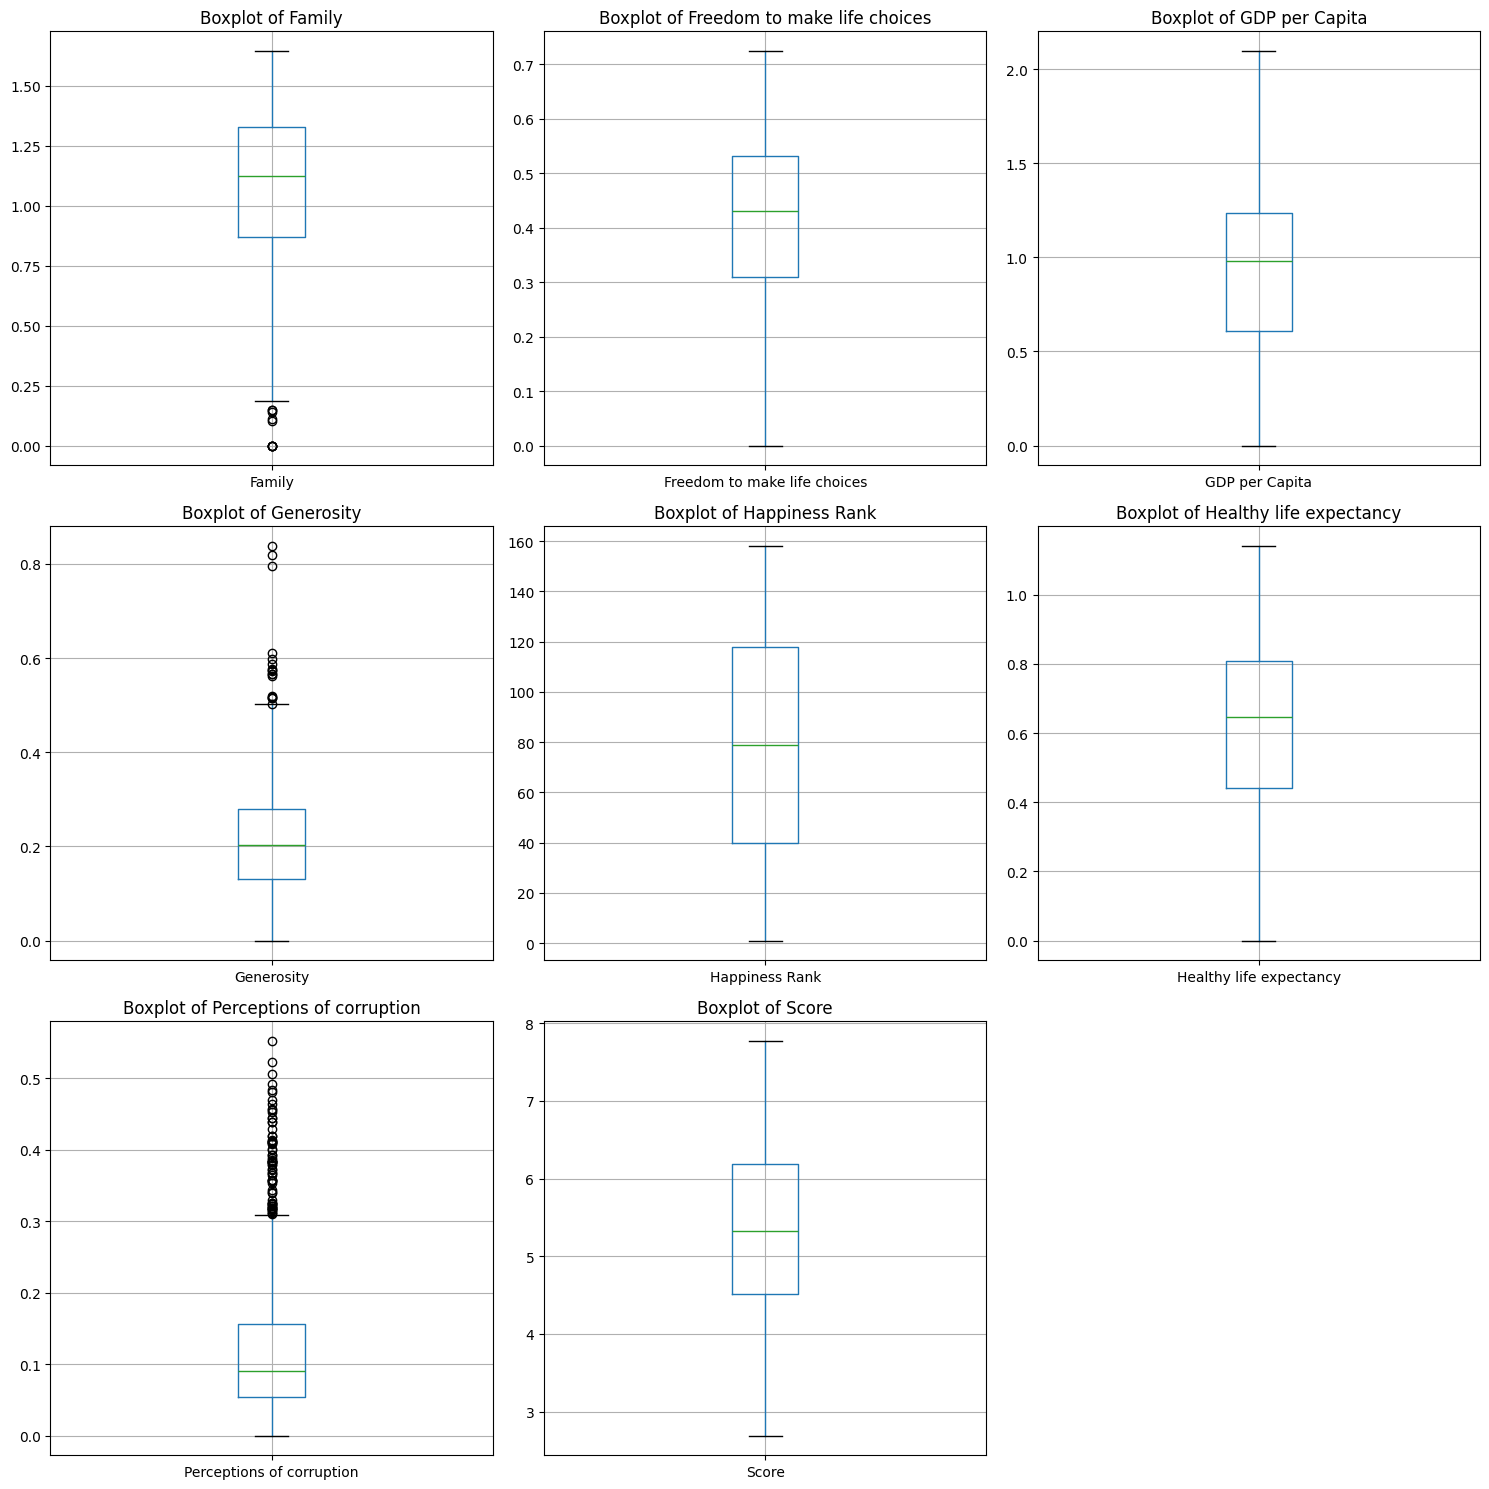

In [74]:
print(df.isnull().sum())
# 열 별로 subplot을 사용하여 각각 boxplot 시각화
numeric_cols = df.select_dtypes(include='number').columns
selected_cols = [col for col in numeric_cols if df[col].max() < 1000]

n = len(selected_cols)
cols = 3
rows = (n // cols) + (n % cols > 0)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, col in enumerate(selected_cols):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# 나머지 빈 subplot 숨기기
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

📈 전체 Boxplot 분석 요약
| 변수명                              | 분석 요약                                                            |
| -------------------------------- | ---------------------------------------------------------------- |
| **Family**                       | 대부분 국가에서 0.8\~1.2 사이로 높은 사회적 지지 수준을 보임. 이상치는 많지 않음.              |
| **Freedom to make life choices** | 대체로 0.3\~0.6 사이. 일부 국가에서 자유가 매우 낮음 (0에 가까운 이상치 존재).              |
| **GDP per Capita**               | 중앙값은 약 1.0. 소득 수준의 격차가 큼 (0.0 \~ 2.1). 저소득 국가가 많고 일부 고소득 국가가 존재. |
| **Generosity**                   | 중앙값은 낮고(0.2 내외), 이상치가 매우 많음. 일부 국가에서 높은 기부 수준을 보임.               |
| **Happiness Rank**               | 전체 순위 분포가 균등에 가까움. 분포는 거의 전체 국가 수를 반영 (1\~150위).                 |
| **Healthy life expectancy**      | 0.3\~1.0 범위. 건강 기대 수명도 국가 간 차이가 뚜렷함. 중앙값은 약 0.7.                 |
| **Perceptions of corruption**    | 중앙값은 낮고(0.1대), 일부 국가는 0.5 이상으로 부패 인식이 심각. 이상치 다수 존재.             |
| **Score (행복 점수)**                | 대부분 국가가 4.5\~6.5 사이. 최고는 약 7.8, 최저는 2.8 근처로 관측됨.                 |


## 05. 변수 분포 시각화

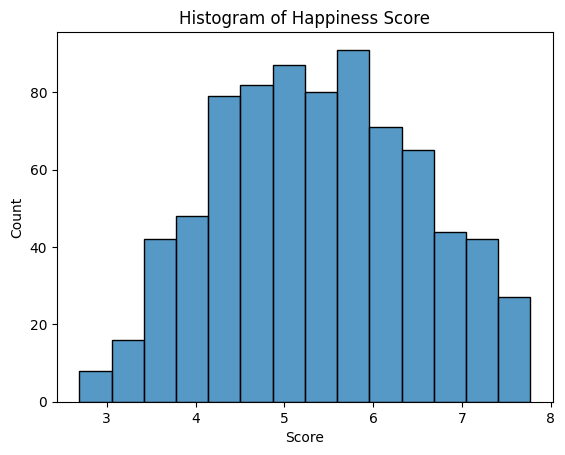

In [75]:
import seaborn as sns

sns.histplot(df['Score'].dropna())
plt.title("Histogram of Happiness Score")
plt.show()

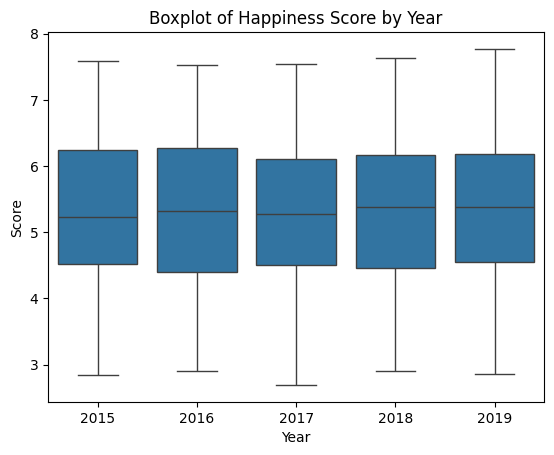

In [76]:
sns.boxplot(x='Year', y='Score', data=df)
plt.title("Boxplot of Happiness Score by Year")
plt.show()

## 06. 변수 간 관계 시각화

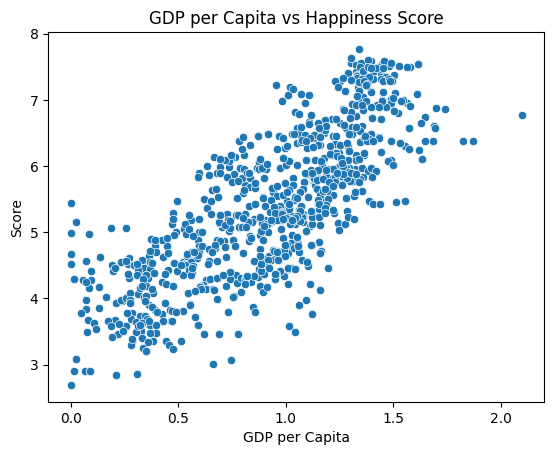

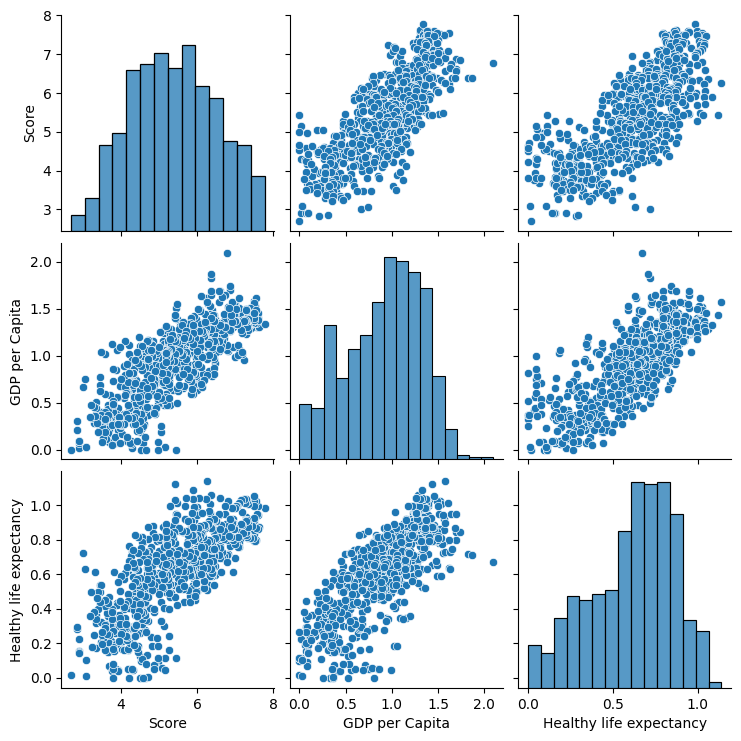

In [77]:
sns.scatterplot(x='GDP per Capita', y='Score', data=df)
plt.title("GDP per Capita vs Happiness Score")
plt.show()

sns.pairplot(df[['Score', 'GDP per Capita', 'Healthy life expectancy']])
plt.show()

## 07. 상관관계 분석

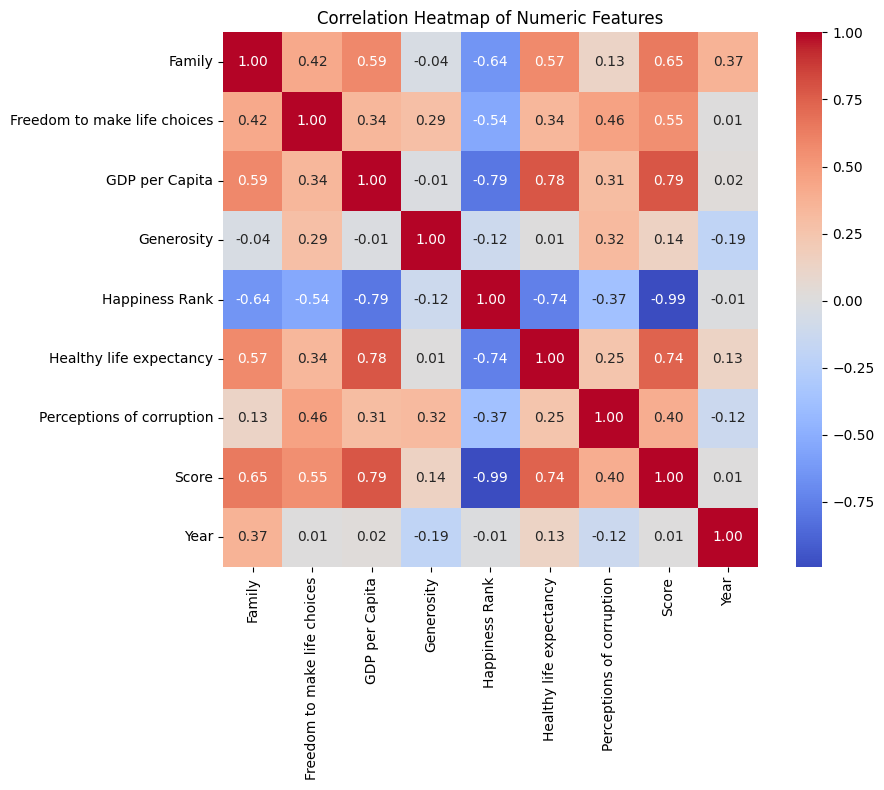

In [78]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

## 08. 데이터 전처리

In [79]:
# 결측치 확인
print("Missing values by column:")
print(df.isnull().sum())

# 결측치 제거
df = df.dropna(subset=['Perceptions of corruption'])
print(df.isnull().sum())

Missing values by column:
Country                         0
Family                          0
Freedom to make life choices    0
GDP per Capita                  0
Generosity                      0
Happiness Rank                  0
Healthy life expectancy         0
Perceptions of corruption       1
Score                           0
Year                            0
dtype: int64
Country                         0
Family                          0
Freedom to make life choices    0
GDP per Capita                  0
Generosity                      0
Happiness Rank                  0
Healthy life expectancy         0
Perceptions of corruption       0
Score                           0
Year                            0
dtype: int64


## 09. Feature Engineering

In [80]:
df['Score_Level'] = pd.cut(df['Score'], bins=[0, 4, 5.5, 7, 10],
                           labels=['Low', 'Mid', 'High', 'Very High'])
df['Score_Level']

0      Very High
1      Very High
2      Very High
3      Very High
4      Very High
         ...    
777          Low
778          Low
779          Low
780          Low
781          Low
Name: Score_Level, Length: 781, dtype: category
Categories (4, object): ['Low' < 'Mid' < 'High' < 'Very High']

## 10. 최종 요약 및 인사이트 도출

In [81]:
print("\n연도별 평균 행복 점수:")
print(df.groupby('Year')['Score'].mean())

print("\n상위 10개 국가:")
print(df.sort_values('Score', ascending=False)[['Country', 'Year', 'Score']].head(10))

print("\n하위 10개 국가:")
print(df.sort_values('Score', ascending=True)[['Country', 'Year', 'Score']].head(10))


연도별 평균 행복 점수:
Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.366897
2019    5.407096
Name: Score, dtype: float64

상위 10개 국가:
         Country  Year  Score
626      Finland  2019  7.769
470      Finland  2018  7.632
627      Denmark  2019  7.600
471       Norway  2018  7.594
0    Switzerland  2015  7.587
1        Iceland  2015  7.561
472      Denmark  2018  7.555
628       Norway  2019  7.554
315       Norway  2017  7.537
2        Denmark  2015  7.527

하위 10개 국가:
                      Country  Year  Score
469  Central African Republic  2017  2.693
157                      Togo  2015  2.839
781               South Sudan  2019  2.853
468                   Burundi  2017  2.905
625                   Burundi  2018  2.905
156                   Burundi  2015  2.905
314                   Burundi  2016  2.905
155                     Syria  2015  3.006
313                     Syria  2016  3.069
780  Central African Republic  2019  3.083


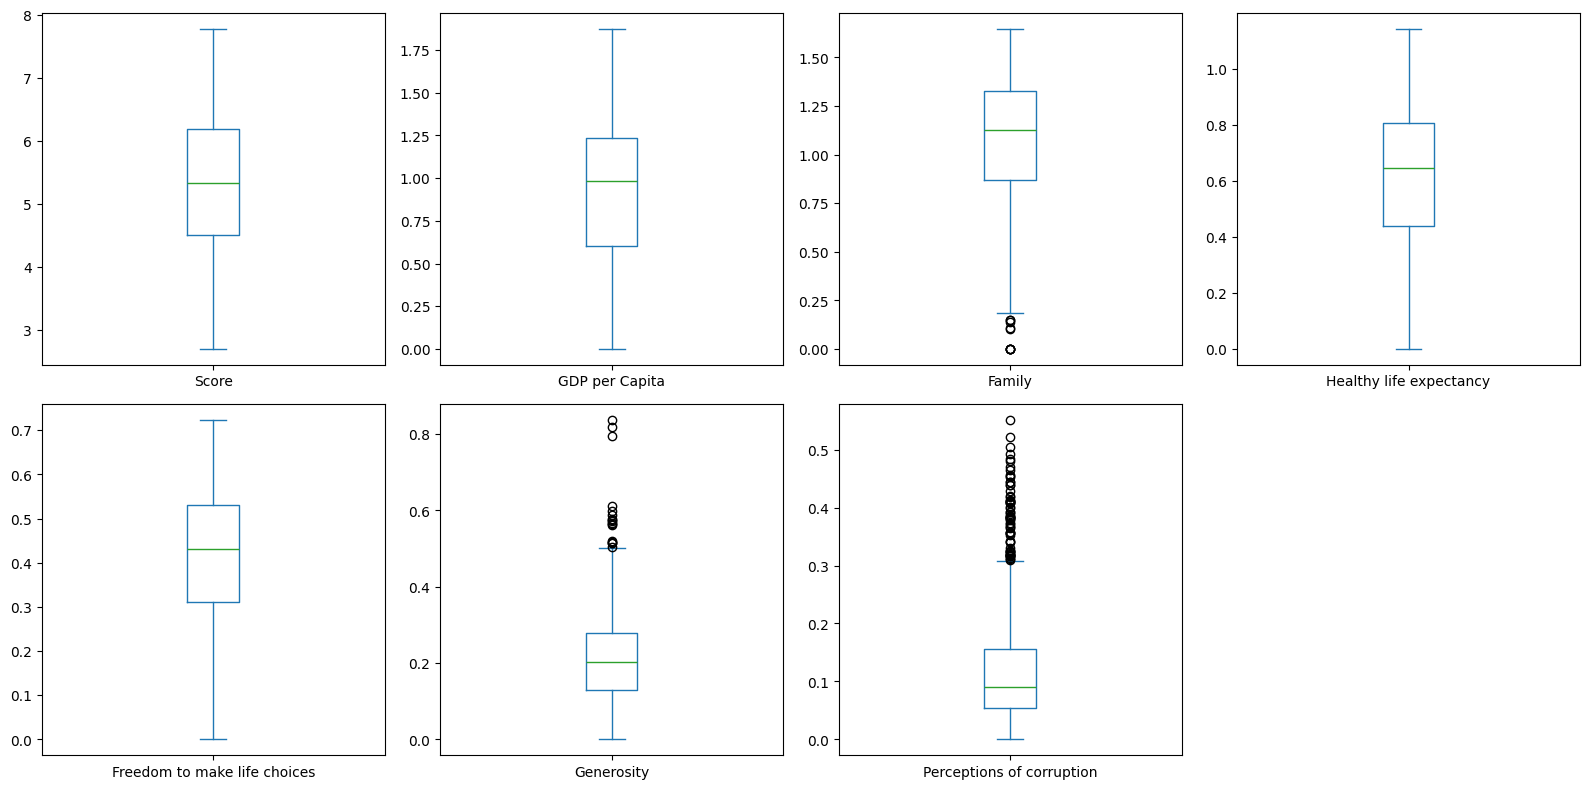

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Score', 'GDP per Capita', 'Family', 'Healthy life expectancy',
                'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
df[numeric_cols].plot(kind='box', subplots=True, layout=(2, 4), figsize=(16, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

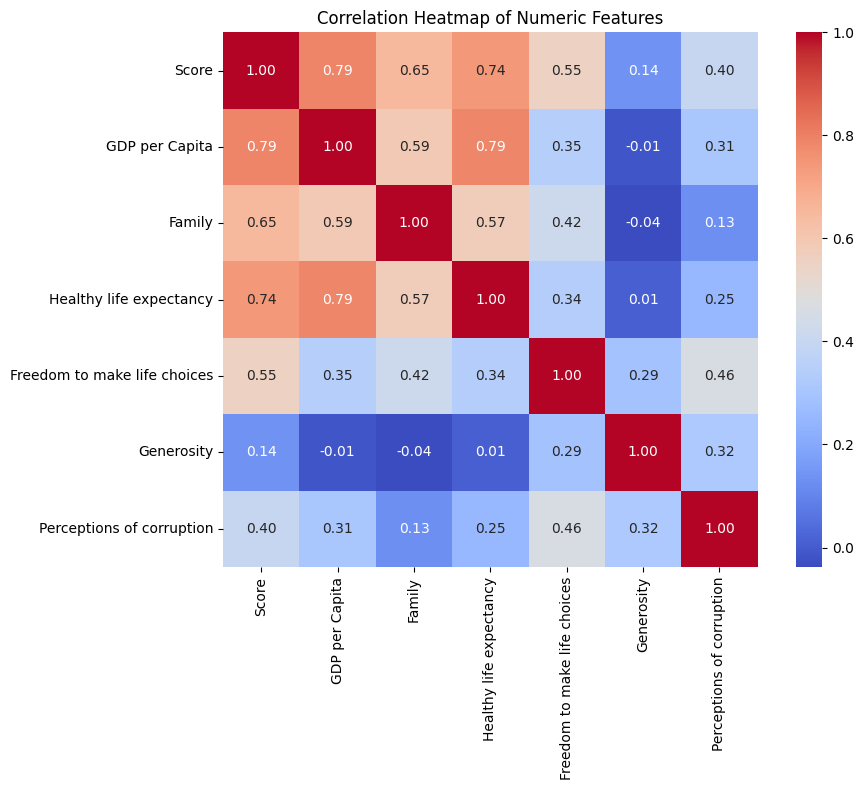

In [83]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()